# Analyzing Healthcare Provider Shortage - Part 2/4

In this part of the study, we will explore geocoded provider data with respect to socioeconomic and demographic factors such as population density, median income, median age, population with health insurance etc. We will study the distribution of:
 - Overall providers in the U.S.
 - Explore Texas to find out how healthcare providers are distributed at the county level

In this section, we will:

 - Get Geocoded data and check geocoding results
 - Gather and Process Demographic and Health Expenditure Data
 - Aggregate Provider Data at the County Level
 - Explore distribution of Heakthcare Providers in U.S.
 - Explore Texas and study how:
     - Provider Count varies with Population Density, Median Income and Median Age

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Get-Geocoded-Provider-Data" data-toc-modified-id="Get-Geocoded-Provider-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Get Geocoded Provider Data</a></span></li><li><span><a href="#Check-Geocoding" data-toc-modified-id="Check-Geocoding-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Check Geocoding</a></span><ul class="toc-item"><li><span><a href="#Geocoding-Check:-Wyoming" data-toc-modified-id="Geocoding-Check:-Wyoming-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Geocoding Check: Wyoming</a></span></li><li><span><a href="#Geocoding-Check:-Arizona" data-toc-modified-id="Geocoding-Check:-Arizona-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Geocoding Check: Arizona</a></span></li><li><span><a href="#Geocoding-Check:-Texas" data-toc-modified-id="Geocoding-Check:-Texas-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Geocoding Check: Texas</a></span></li></ul></li><li><span><a href="#Heat-Map---All-Providers" data-toc-modified-id="Heat-Map---All-Providers-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Heat Map - All Providers</a></span><ul class="toc-item"><li><span><a href="#Heatmap-of-Providers-in-U.S." data-toc-modified-id="Heatmap-of-Providers-in-U.S.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Heatmap of Providers in U.S.</a></span></li></ul></li><li><span><a href="#Gather-and-Process-Data" data-toc-modified-id="Gather-and-Process-Data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Gather and Process Data</a></span><ul class="toc-item"><li><span><a href="#Create-County-Dataframe-from-Demographics-Data" data-toc-modified-id="Create-County-Dataframe-from-Demographics-Data-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Create County Dataframe from Demographics Data</a></span></li><li><span><a href="#Create-County-Dataframe-from-Expenditure-Data" data-toc-modified-id="Create-County-Dataframe-from-Expenditure-Data-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Create County Dataframe from Expenditure Data</a></span></li><li><span><a href="#Spatially-Join-Demographic-and-Health-Expenditure-Data" data-toc-modified-id="Spatially-Join-Demographic-and-Health-Expenditure-Data-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Spatially Join Demographic and Health Expenditure Data</a></span><ul class="toc-item"><li><span><a href="#Check-Merge-Results" data-toc-modified-id="Check-Merge-Results-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Check Merge Results</a></span></li></ul></li><li><span><a href="#Get-Provider-Count---Aggregate-Data" data-toc-modified-id="Get-Provider-Count---Aggregate-Data-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Get Provider Count - Aggregate Data</a></span></li><li><span><a href="#Get-Aggregated-Data-Layer" data-toc-modified-id="Get-Aggregated-Data-Layer-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Get Aggregated Data Layer</a></span><ul class="toc-item"><li><span><a href="#Clean-Data" data-toc-modified-id="Clean-Data-4.5.1"><span class="toc-item-num">4.5.1&nbsp;&nbsp;</span>Clean Data</a></span></li><li><span><a href="#Plot-Spatially-Enabled-Data" data-toc-modified-id="Plot-Spatially-Enabled-Data-4.5.2"><span class="toc-item-num">4.5.2&nbsp;&nbsp;</span>Plot Spatially Enabled Data</a></span></li></ul></li></ul></li><li><span><a href="#Plot-People-to-Provider-Ratio---US" data-toc-modified-id="Plot-People-to-Provider-Ratio---US-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Plot People to Provider Ratio - US</a></span><ul class="toc-item"><li><span><a href="#Get-Cleaned-Data" data-toc-modified-id="Get-Cleaned-Data-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Get Cleaned Data</a></span></li><li><span><a href="#Plot-People-per-Provider" data-toc-modified-id="Plot-People-per-Provider-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Plot People per Provider</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Define-Renderer" data-toc-modified-id="Define-Renderer-5.2.0.1"><span class="toc-item-num">5.2.0.1&nbsp;&nbsp;</span>Define Renderer</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#The-Lone-Star-State---Exploring-Texas" data-toc-modified-id="The-Lone-Star-State---Exploring-Texas-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>The Lone Star State - Exploring Texas</a></span><ul class="toc-item"><li><span><a href="#Provider-and-Population-Density" data-toc-modified-id="Provider-and-Population-Density-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Provider and Population Density</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Define-Renderer" data-toc-modified-id="Define-Renderer-6.1.0.1"><span class="toc-item-num">6.1.0.1&nbsp;&nbsp;</span>Define Renderer</a></span></li><li><span><a href="#Plot-Map" data-toc-modified-id="Plot-Map-6.1.0.2"><span class="toc-item-num">6.1.0.2&nbsp;&nbsp;</span>Plot Map</a></span></li></ul></li></ul></li><li><span><a href="#Provider-and-Avg.-Household-Income" data-toc-modified-id="Provider-and-Avg.-Household-Income-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Provider and Avg. Household Income</a></span></li><li><span><a href="#Provider-and-Median-Age" data-toc-modified-id="Provider-and-Median-Age-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Provider and Median Age</a></span></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Summary</a></span></li></ul></div>

# Part 2: Provider Shortage - Data Exploration

In [1]:
# Import Libraries
from IPython.display import display

# Import arcgis
import arcgis
from arcgis.gis import GIS
from arcgis.features import FeatureLayer
from arcgis.mapping import WebMap

# Import libraries for data exploration
import pandas as pd
pd.set_option('display.max_columns', 500)
import numpy as np

# Import plotting libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Import library for time
import time

In [2]:
# Create a GIS connection
gis = GIS("https://datascienceqa.esri.com/portal", "portaladmin", "esri.agp", verify_cert=False)

## Get Geocoded Provider Data

Provider data was geocoded using the GeoAnalytics server. Let's get the geocoded [provider data feature layer](https://datascienceqa.esri.com/portal/home/item.html?id=650c5000430a49a6850d93f2434d359a) for exploration.

In [3]:
# Search the feature layer
search_result = gis.content.search('title: provider_data_geocoded_7_30', 'Feature Layer')
search_result

[<Item title:"provider_data_geocoded_7_30" type:Feature Layer Collection owner:portaladmin>]

<Item title:"provider_data_geocoded_7_30" type:Feature Layer Collection owner:portaladmin>
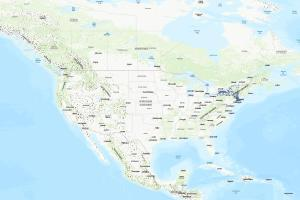

In [4]:
# Get the feature layer item
provider_data_item = search_result[0]
provider_data_item

In [5]:
# Check for layers inside the item
provider_data_item.layers

[<FeatureLayer url:"https://datascienceqa.esri.com/server/rest/services/Hosted/provider_data_geocoded_7_30/FeatureServer/0">]

In [6]:
# Get the layer needed for analysis
provider_data_layer = provider_data_item.layers[0]
provider_data_layer

<FeatureLayer url:"https://datascienceqa.esri.com/server/rest/services/Hosted/provider_data_geocoded_7_30/FeatureServer/0">

In [7]:
# Look at the first 5 fields and their data types
for f in provider_data_layer.properties.fields[:5]:
    print(f['name'],'      ',f['type'])

objectid        esriFieldTypeOID
user_npi        esriFieldTypeDouble
user_entity_type        esriFieldTypeString
user_address        esriFieldTypeString
user_address2        esriFieldTypeString


In [8]:
# Check number of records in `provider_data_layer`
provider_data_layer.query(return_count_only=True)

5790417

## Check Geocoding

Let's do a random test to check accuracy of geocoded data. For a given state, we will look at and plot the data points based on address provided vs address geocoded.

### Geocoding Check: Wyoming

In [ ]:
# Create a spatially enabled dataframe for WY
%time wy_df = provider_data_layer.query(where="user_Region='WY'", as_df=True)
# %time wy_df = provider_data_layer.query(where="USER_Provider_Business_Practice_Location_Address_State_Name='WY'", as_df=True)

wy_df.shape

In [ ]:
# Look at data points that are geocoded outside of Wyoming
len(wy_df[wy_df['region']!='Wyoming'])

In [ ]:
# Check the accuracy of geocoding
print(f'{round(100-((wy_df.shape[1]/wy_df.shape[0])*100),2)} %')

In [ ]:
# map1.take_screenshot(set_as_preview=True)
# Create a map
map1 = gis.map('USA')
map1

In [ ]:
# Plot data points for WY
wy_df.spatial.plot(map1)

In [ ]:
# Remove layers
map1.remove_layers()

> We have an accuracy of >99% with geocoding. From this map, we can see that out of 12770 points that have been geocoded only 3 are outside of WY. Similar analysis can be performed for other states to check for geocoding errors.

### Geocoding Check: Arizona

In [ ]:
# Create a spatially enabled dataframe for AZ
%time az_df = provider_data_layer.query(where="user_Region='AZ'", as_df=True)
# %time az_df = provider_data_layer.query(where="USER_Provider_Business_Practice_Location_Address_State_Name='AZ'", as_df=True)

az_df.shape

In [ ]:
# Look at data points that are geocoded outside of Arizona
len(az_df[az_df['region']!='Arizona'])

### Geocoding Check: Texas

In [ ]:
# Create a spatially enabled dataframe for TX
%time tx_df = provider_data_layer.query(where="user_Region='TX'", as_df=True)
tx_df.shape

In [ ]:
# Look at data points that are geocoded outside of Texas
len(tx_df[tx_df['region']!='Texas'])

## Heat Map - All Providers

### Heatmap of Providers in U.S.

To visualize how healthcare providers are distributed, let's do a heatmap of providers in the United States.

In [ ]:
# Create a map
map_usa = gis.map('USA')
map_usa

In [ ]:
# Add provider data and create a heatmap
renderer = {"renderer": "autocast", #This tells python to use JS autocasting
            "type": "heatmap",
            "blurRadius":1,  # changes the size of the clusters
            "maxPixelIntensity":2,
            "minPixelIntensity":0,
            "field":None}
renderer["colorStops"] = [{"ratio":0,"color":[63, 40, 102, 0]},
                          {"ratio":0.25,"color":[167,97,170,179]},
                          {"ratio":0.50,"color":"#7b3ce9"},
                          {"ratio":0.75,"color":[222,102,0,179]},
                          {"ratio":1,"color":[244,204,0,179]}]
#                           {"ratio":1,"color":"#ffff00"}]
map_usa.add_layer(provider_data_layer,
               { "type": "FeatureLayer",
                 "renderer": renderer,
                })

In [ ]:
# Add Legend
map_usa.legend = True

In [ ]:
# Remove layers
map_usa.remove_layers()

> The map shows distribution of providers throughout the US. We can see large gaps in Nevada, Idaho, Utah, Wyoming and Texas. These and other states can be explored further for analysis.

## Gather and Process Data
<a name="gather-data"></a>

### Create County Dataframe from Demographics Data
<a name="demographic-data"></a>

Here, we will search for demographic data at the county level. To do this, we will:
  - Search for Population density feature layer collection from Esri Living Atlas
  - Select the layer for county level data
  - Create a dataframe of county level demographic data by specifying the columns we need for our analysis

<Item title:"2018 USA Population Density" type:Map Image Layer owner:esri_livingatlas>
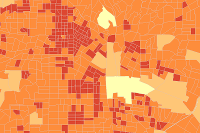

In [9]:
# Search for and get Population data layer
popdensity = gis.content.get('ab4e1996d588405d9cd68348ef660f70')
popdensity

In [10]:
# Check first 5 layers in population Density
popdensity.layers[:5]

[<FeatureLayer url:"https://datascienceqa.esri.com/portal/sharing/servers/ab4e1996d588405d9cd68348ef660f70/rest/services/USA_Demographics_and_Boundaries_2018/MapServer/0">,
 <FeatureLayer url:"https://datascienceqa.esri.com/portal/sharing/servers/ab4e1996d588405d9cd68348ef660f70/rest/services/USA_Demographics_and_Boundaries_2018/MapServer/1">,
 <FeatureLayer url:"https://datascienceqa.esri.com/portal/sharing/servers/ab4e1996d588405d9cd68348ef660f70/rest/services/USA_Demographics_and_Boundaries_2018/MapServer/2">,
 <FeatureLayer url:"https://datascienceqa.esri.com/portal/sharing/servers/ab4e1996d588405d9cd68348ef660f70/rest/services/USA_Demographics_and_Boundaries_2018/MapServer/3">,
 <FeatureLayer url:"https://datascienceqa.esri.com/portal/sharing/servers/ab4e1996d588405d9cd68348ef660f70/rest/services/USA_Demographics_and_Boundaries_2018/MapServer/4">]

In [11]:
# Look at first few field names for county layer
county_layer = popdensity.layers[46]
print('FIELD NAME', '\t\t', 'FIELD ALIAS')
for field in county_layer.properties.fields[:10]:
    print(field['name'], '\t\t', field['alias'])

FIELD NAME 		 FIELD ALIAS
OBJECTID 		 OBJECTID
Shape 		 Shape
ID 		 ID
NAME 		 NAME
STATE_NAME 		 STATE_NAME
ST_ABBREV 		 ST_ABBREV
AREA 		 Area in Square Miles (Calculated)
TOTPOP_CY 		 2018 Total Population (Esri)
HHPOP_CY 		 2018 Household Population (Esri)
FAMPOP_CY 		 2018 Family Population (Esri)


In [14]:
# Create dataframe of specific attributes for Counties

# Run time to check query duration (optional)
import time
start_time = time.time()

# Query the layer
county_layer = popdensity.layers[46]
county_df = pd.DataFrame()
offset = 0
while offset <= 3000:
    chunk_df = county_layer.query(out_fields=['Shape','ST_ABBREV','NAME','ASIAN_CY','AMERIND_CY','AVGHHSZ_CY','AVGHINC_CY','BLACK_CY','EDUCBASECY','HISPPOP_CY',
                          'MEDAGE_CY','MINORITYCY','OTHRACE_CY','PCI_CY','POPDENS_CY','UNEMPRT_CY','WHITE_CY','SMCOLL_CY',
                          'ASSCDEG_CY','BACHDEG_CY','GRADDEG_CY','TOTPOP_CY'],return_all_records=False,result_offset=offset,result_record_count=750,as_df=True)
    county_df = pd.concat([chunk_df, county_df], ignore_index=True)
    
    offset += 750
    
duration = time.time()-start_time
print(f'Time elapsed: {duration/60} mins')

Time elapsed: 0.918800679842631 mins


In [15]:
county_df.shape

(3142, 23)

### Create County Dataframe from Expenditure Data
<a name="exp-data"></a>

Here, we will search for health expenditure data at the county level. To do this, we will:
  - Search for layers related to healthcare spendings from Esri Living Atlas
  - Select the Health Insurance Spending layer for county level data
  - Create a dataframe of county level health expenses data by specifying the columns we need for our analysis

<Item title:"2018 USA Health Insurance Spending" type:Map Image Layer owner:esri_livingatlas>
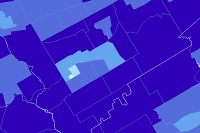

In [16]:
# Search for and get Healthcare expenditure data layer
health_exp = gis.content.get('3fe029d089124e5dab518fd2c4f7eabe')
health_exp

In [17]:
# Check first few layers in population Density
health_exp.layers[:5]

[<FeatureLayer url:"https://datascienceqa.esri.com/portal/sharing/servers/3fe029d089124e5dab518fd2c4f7eabe/rest/services/USA_Consumer_Expenditures_2018/MapServer/0">,
 <FeatureLayer url:"https://datascienceqa.esri.com/portal/sharing/servers/3fe029d089124e5dab518fd2c4f7eabe/rest/services/USA_Consumer_Expenditures_2018/MapServer/1">,
 <FeatureLayer url:"https://datascienceqa.esri.com/portal/sharing/servers/3fe029d089124e5dab518fd2c4f7eabe/rest/services/USA_Consumer_Expenditures_2018/MapServer/2">,
 <FeatureLayer url:"https://datascienceqa.esri.com/portal/sharing/servers/3fe029d089124e5dab518fd2c4f7eabe/rest/services/USA_Consumer_Expenditures_2018/MapServer/3">,
 <FeatureLayer url:"https://datascienceqa.esri.com/portal/sharing/servers/3fe029d089124e5dab518fd2c4f7eabe/rest/services/USA_Consumer_Expenditures_2018/MapServer/4">]

In [18]:
# Look at the fields and their data types
health_exp_county_layer = health_exp.layers[46]
print('FIELD NAME', '\t', 'FIELD ALIAS')
for f in health_exp_county_layer.properties.fields[:5]:
    print(f['name'], '\t',f['alias'])

FIELD NAME 	 FIELD ALIAS
OBJECTID 	 OBJECTID
Shape 	 Shape
ID 	 ID
NAME 	 NAME
STATE_NAME 	 STATE_NAME


In [20]:
# Create a dataframe using specific attributes for Counties

# Run time to check query duration (optional)
import time
start_time = time.time()

# Query the layer
health_exp_county_layer = health_exp.layers[46]

health_exp_county_df = pd.DataFrame()
offset = 0
while offset <= 3000:
    chunk_df = health_exp_county_layer.query(out_fields=['ST_ABBREV','NAME','X8001_A','X8002_A','X8013_A','X8018_A','X8019_A','X8024_A','X8032_A','X13002_A','X13004_A'], return_all_records=False,result_offset=offset,result_record_count=500,as_df=True)
    health_exp_county_df = pd.concat([chunk_df, health_exp_county_df], ignore_index=True)
    offset += 500
 

duration = time.time()-start_time
print(f'Time elapsed: {duration/60:.2} mins')   

Time elapsed: 1.2 mins


In [21]:
health_exp_county_df.shape

(3142, 13)

### Spatially Join Demographic and Health Expenditure Data
<a name="demo-health"></a>

We will spatially join both the demographic and expenditure layer so as to combine data into a single layer.

In [22]:
# Merge demographic and health expenditure data at county level

county_healthexp_df = county_df.spatial.join(health_exp_county_df,how='left', op='within')

In [23]:
# Check geometry type
county_healthexp_df.spatial.geometry_type

['polygon']

In [24]:
# Check shape of data
county_healthexp_df.shape

(3142, 36)

In [ ]:
# Write the data into a file geodatabase
county_healthexp_df.spatial.to_featureclass(r'C:\Users\mohi9282\Desktop\arcgis\demographic_healthexp.gdb\demographic_healthexp_layer')

This feature class can now be published as a feature service to the portal. We have published this layer as `demographic_healthexp_layer` which can be downloaded and used for aggregating data.

#### Check Merge Results

In [25]:
# Random check data from combined layer
county_healthexp_df[(county_healthexp_df['ST_ABBREV_left']=='NM') & (county_healthexp_df['NAME_left']=='Chaves County')]

,OBJECTID_left,ST_ABBREV_left,NAME_left,ASIAN_CY,AMERIND_CY,AVGHHSZ_CY,AVGHINC_CY,BLACK_CY,EDUCBASECY,HISPPOP_CY,MEDAGE_CY,MINORITYCY,OTHRACE_CY,PCI_CY,POPDENS_CY,UNEMPRT_CY,WHITE_CY,SMCOLL_CY,ASSCDEG_CY,BACHDEG_CY,GRADDEG_CY,TOTPOP_CY,SHAPE,index_right,OBJECTID_right,ST_ABBREV_right,NAME_right,X8001_A,X8002_A,X8013_A,X8018_A,X8019_A,X8024_A,X8032_A,X13002_A,X13004_A
1189,1798,NM,Chaves County,542,972,2.74,54751,1222,42002,38232,35.5,41000,16119,19980,10.9,5.2,44914,9912,3752,5830,2698,66164,"{'rings': [[[-11571218.0164, 4039879.771099999...",1439,1798,NM,Chaves County,4034.11,2645.58,480.73,1388.53,737.0,43.09,102.35,255.81,5075.13


In [26]:
# Confirm results with County demographic data
county_df[(county_df['ST_ABBREV']=='NM') & (county_df['NAME']=='Chaves County')]

,OBJECTID,ST_ABBREV,NAME,ASIAN_CY,AMERIND_CY,AVGHHSZ_CY,AVGHINC_CY,BLACK_CY,EDUCBASECY,HISPPOP_CY,MEDAGE_CY,MINORITYCY,OTHRACE_CY,PCI_CY,POPDENS_CY,UNEMPRT_CY,WHITE_CY,SMCOLL_CY,ASSCDEG_CY,BACHDEG_CY,GRADDEG_CY,TOTPOP_CY,SHAPE
1189,1798,NM,Chaves County,542,972,2.74,54751,1222,42002,38232,35.5,41000,16119,19980,10.9,5.2,44914,9912,3752,5830,2698,66164,"{'rings': [[[-11571218.0164, 4039879.771099999..."


In [27]:
# Confirm results with health expenditure data
health_exp_county_df[(health_exp_county_df['ST_ABBREV']=='NM') & (health_exp_county_df['NAME']=='Chaves County')]

,OBJECTID,ST_ABBREV,NAME,X8001_A,X8002_A,X8013_A,X8018_A,X8019_A,X8024_A,X8032_A,X13002_A,X13004_A,SHAPE
1439,1798,NM,Chaves County,4034.11,2645.58,480.73,1388.53,737.0,43.09,102.35,255.81,5075.13,"{'rings': [[[-11571218.0164, 4039879.771099999..."


### Get Provider Count - Aggregate Data

Now, we would like to get the provider count for each county. Provider count is a key variable and we can get the count in multiple ways:
    - Method 1: We can query the provider data layer, store results in a spatially enabled dataframe and generate counts.
    - Method 2: Use `AggregatePoints` tool from the GeoAnalytics Desktop Toolbox.
    
Method 1 fails due to the size and memory usage required for our data. This is where the power of GeoAnalytics Toolkit shines.

`AggregatePoints` tool helps us aggregate point data (providers) onto polygon data (counties). The output generated is a polygon layer with some aggregated statistics.

We will run `AggregatePoints` with `provider data` as our point layer and `demographic_healthexp_layer` as the polygon layer.
In simple words, this tool will grab all the providers in a particular county and give us an aggregate count of providers for that county along with other demographic and health expenditure data that was in the polygon layer for counties.

Learn more about [GeoAnalytics Desktop](https://pro.arcgis.com/en/pro-app/tool-reference/geoanalytics-desktop/aggregate-points.htm).

In [28]:
import arcpy

In [29]:
# Run Aggregate Points tool
arcpy.gapro.AggregatePoints(r"C:\Users\mohi9282\Documents\ArcGIS\Projects\Pro_ArcGIS\Projects\GWR test\npi_provider.gdb\allstates_provider",
                            r"C:\Users\mohi9282\Desktop\HealtcareProviderProject\arcgis\aggregate_points.gdb\agg_points_layer", "POLYGON",
                            r"C:\Users\mohi9282\Desktop\HealtcareProviderProject\arcgis\demographic_healthexp.gdb\demographic_healthexp_layer",
                            '', None, None, None, None, None)

AttributeError: 'ToolValidator' object has no attribute 'isLicensed'

AttributeError: 'ToolValidator' object has no attribute 'isLicensed'

<Result 'C:\\Users\\mohi9282\\Desktop\\HealtcareProviderProject\\arcgis\\aggregate_points.gdb\\agg_points_layer'>

This aggregated data layer can now be published as a feature service to the portal. We have published this layer as `demo_healthexp_allproviders` which will be accessed and used for further analysis.

### Get Aggregated Data Layer
<a name="merge"></a>
Get the aggrageted data layer that includes provider count and other demographics data

In [30]:
# Search for the layer
allsearch_result = gis.content.search('title: demo_healthexp_allproviders')
allsearch_result

[<Item title:"demo_healthexp_allproviders" type:Feature Layer Collection owner:portaladmin>,
 <Item title:"demo_healthexp_allproviders" type:Service Definition owner:portaladmin>]

<Item title:"demo_healthexp_allproviders" type:Feature Layer Collection owner:portaladmin>
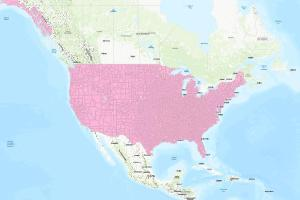

In [31]:
# Get the layer
allprovider = allsearch_result[0]
allprovider

In [32]:
allprovider.layers

[<FeatureLayer url:"https://datascienceqa.esri.com/server/rest/services/Hosted/demo_healthexp_allproviders/FeatureServer/0">]

In [33]:
# Look at the top 5 fields in the layer
allprovider_layer = allprovider.layers[0]
for f in allprovider_layer.properties.fields[:5]:
    print(f['name'], '\t',f['alias'])

objectid1 	 OBJECTID1
objectid 	 OBJECTID
objectid_left 	 OBJECTID_left
st_abbrev_left 	 ST_ABBREV_left
name_left 	 NAME_left


In [34]:
# Store data from layer as a spatially enabled dataframe
allprovider_df = allprovider_layer.query(as_df=True)
allprovider_df.shape

(3139, 41)

In [35]:
# Look at the first few rows of dataframe
allprovider_df.head()

,SHAPE,SHAPE__Area,SHAPE__Length,amerind_cy,asian_cy,asscdeg_cy,avghhsz_cy,avghinc_cy,bachdeg_cy,black_cy,count,educbasecy,graddeg_cy,hisppop_cy,index_right,medage_cy,minoritycy,name_left,name_right,objectid,objectid1,objectid_left,objectid_right,othrace_cy,pci_cy,popdens_cy,smcoll_cy,st_abbrev_left,st_abbrev_right,totpop_cy,unemprt_cy,white_cy,x13002_a,x13004_a,x8001_a,x8002_a,x8013_a,x8018_a,x8019_a,x8024_a,x8032_a
0,"{'rings': [[[-8529642.2486, 4688391.039899997]...",9.139007e+08,0.0,423,1701,5020,2.85,118378,10961,12062,1044.0,65337,8931,3945,1838,41.0,20664,Calvert County,Calvert County,2089,1,1197,1197,886,41430,440.2,16211,MD,MD,93836,5.6,75625,592.98,11766.62,7896.60,5227.44,767.21,2669.16,1497.17,83.06,157.57
1,"{'rings': [[[-10120538.0346, 3896326.054200001...",1.526209e+09,0.0,3,6,29,2.40,38216,50,895,5.0,977,45,8,2070,37.9,913,Issaquena County,Issaquena County,2321,2,1429,1429,2,16066,3.4,199,MS,MS,1403,5.2,494,191.88,3298.61,3310.96,2149.61,475.83,1161.34,579.97,36.65,102.27
2,"{'rings': [[[-9221715.5229, 5050074.560699999]...",2.522762e+09,0.0,168,421,4309,2.47,63225,3811,1422,621.0,38284,2153,2977,758,40.0,5873,Seneca County,Seneca County,1509,3,2117,2117,882,24981,101.8,7627,OH,OH,56104,5.5,51908,313.28,5933.05,4698.76,3081.77,547.19,1616.99,861.89,51.40,114.41
3,"{'rings': [[[-9290699.0981, 4093591.7993], [-9...",8.908702e+08,0.0,69,258,855,2.77,60360,990,558,79.0,13282,574,1307,3034,40.4,2464,Banks County,Banks County,2785,4,393,393,759,21821,81.6,2043,GA,GA,18940,3.1,16894,289.06,5640.16,4625.75,3042.93,557.61,1582.82,822.59,47.81,122.89
4,"{'rings': [[[-9341355.0324, 3994505.8356000036...",4.963801e+08,0.0,307,1727,5603,2.81,73754,11105,49467,1210.0,60571,5462,9491,2150,37.8,62154,Rockdale County,Rockdale County,2901,5,509,509,4497,26350,692.1,11944,GA,GA,89832,6.1,31300,344.50,7113.68,5085.66,3356.61,520.50,1729.05,948.00,54.48,109.17


We can see that the dataframe (`allprovider_df`) has 3139 rows and 41 columns.

#### Clean Data

Here we will:
 - Check for Null values
 - Remove any duplicate columns
 - Rename columns

In [36]:
# Check for null values
allprovider_df.isnull().sum()

SHAPE              0
SHAPE__Area        0
SHAPE__Length      0
amerind_cy         0
asian_cy           0
asscdeg_cy         0
avghhsz_cy         0
avghinc_cy         0
bachdeg_cy         0
black_cy           0
count              0
educbasecy         0
graddeg_cy         0
hisppop_cy         0
index_right        0
medage_cy          0
minoritycy         0
name_left          0
name_right         0
objectid           0
objectid1          0
objectid_left      0
objectid_right     0
othrace_cy         0
pci_cy             0
popdens_cy         0
smcoll_cy          0
st_abbrev_left     0
st_abbrev_right    0
totpop_cy          0
unemprt_cy         0
white_cy           0
x13002_a           0
x13004_a           0
x8001_a            0
x8002_a            0
x8013_a            0
x8018_a            0
x8019_a            0
x8024_a            0
x8032_a            0
dtype: int64

In [37]:
# Check for duplicate columns
allprovider_df.columns

Index(['SHAPE', 'SHAPE__Area', 'SHAPE__Length', 'amerind_cy', 'asian_cy',
       'asscdeg_cy', 'avghhsz_cy', 'avghinc_cy', 'bachdeg_cy', 'black_cy',
       'count', 'educbasecy', 'graddeg_cy', 'hisppop_cy', 'index_right',
       'medage_cy', 'minoritycy', 'name_left', 'name_right', 'objectid',
       'objectid1', 'objectid_left', 'objectid_right', 'othrace_cy', 'pci_cy',
       'popdens_cy', 'smcoll_cy', 'st_abbrev_left', 'st_abbrev_right',
       'totpop_cy', 'unemprt_cy', 'white_cy', 'x13002_a', 'x13004_a',
       'x8001_a', 'x8002_a', 'x8013_a', 'x8018_a', 'x8019_a', 'x8024_a',
       'x8032_a'],
      dtype='object')

We can see that the OBJECTID, ST_ABBREV AND index columns have duplicates. We will drop these duplicate columns from our data.

In [38]:
# Drop duplicate columns
allprovider_df.drop(['objectid1','objectid','index_right','objectid_right','st_abbrev_right','name_right',
                    'SHAPE__Length', 'SHAPE__Area'], axis=1, inplace=True)
allprovider_df.columns

Index(['SHAPE', 'amerind_cy', 'asian_cy', 'asscdeg_cy', 'avghhsz_cy',
       'avghinc_cy', 'bachdeg_cy', 'black_cy', 'count', 'educbasecy',
       'graddeg_cy', 'hisppop_cy', 'medage_cy', 'minoritycy', 'name_left',
       'objectid_left', 'othrace_cy', 'pci_cy', 'popdens_cy', 'smcoll_cy',
       'st_abbrev_left', 'totpop_cy', 'unemprt_cy', 'white_cy', 'x13002_a',
       'x13004_a', 'x8001_a', 'x8002_a', 'x8013_a', 'x8018_a', 'x8019_a',
       'x8024_a', 'x8032_a'],
      dtype='object')

In [39]:
# Rename Columns
allprovider_df.rename(columns={'x8001_a':'avg_healthcare','x8002_a':'avg_healthinsurance','x8013_a':'avg_medicare',
                                  'x8018_a':'avg_medicalcare','x8019_a':'avg_medicalsrvc','x8024_a':'avg_labtest',
                                  'x8032_a':'avg_presdrug','x13002_a':'avg_personalinsurance','x13004_a':'avg_socsecurity',
                                  'asian_cy':'asian_pop','amerind_cy':'amerind_pop','avghhsz_cy':'avg_hhsz',
                                  'avghinc_cy':'avg_hhinc','black_cy':'black_pop','educbasecy':'edubase',
                                  'hisppop_cy':'hisp_pop','medage_cy':'median_age','minoritycy':'minority_pop',
                                  'othrace_cy':'otherace_pop','pci_cy':'percap_income','popdens_cy':'pop_density',
                                  'unemprt_cy':'unemp_rate','white_cy':'white_pop','smcoll_cy':'some_college',
                                  'asscdeg_cy':'asso_deg','bachdeg_cy':'bach_deg','graddeg_cy':'grad_deg','totpop_cy':'total_population',
                                  'st_abbrev_left':'state','name_left':'county','count':'provider_count','objectid_left':'objectid'}, inplace=True)
allprovider_df.columns

Index(['SHAPE', 'amerind_pop', 'asian_pop', 'asso_deg', 'avg_hhsz',
       'avg_hhinc', 'bach_deg', 'black_pop', 'provider_count', 'edubase',
       'grad_deg', 'hisp_pop', 'median_age', 'minority_pop', 'county',
       'objectid', 'otherace_pop', 'percap_income', 'pop_density',
       'some_college', 'state', 'total_population', 'unemp_rate', 'white_pop',
       'avg_personalinsurance', 'avg_socsecurity', 'avg_healthcare',
       'avg_healthinsurance', 'avg_medicare', 'avg_medicalcare',
       'avg_medicalsrvc', 'avg_labtest', 'avg_presdrug'],
      dtype='object')

In [40]:
allprovider_df.shape

(3139, 33)

#### Plot Spatially Enabled Data

In [41]:
allprovider_df.spatial.plot()

MapView(layout=Layout(height='400px', width='100%'))

This map shows all countiues with demographic and health expenditure information for each county.

In [ ]:
# Write the data into a file geodatabase
allprovider_df.spatial.to_featureclass(r'C:\Users\mohi9282\Desktop\arcgis\demographic_healthexp.gdb\demographic_healthexp_clean_allproviders')


This cleaned aggregated data layer can now be published as a feature service to the portal. We have published this layer as `demographic_healthexp_clean_allproviders` which will be accessed and used for further analysis.

## Plot People to Provider Ratio - US

### Get Cleaned Data

In [42]:
# Search for the data layer
allsearch_result = gis.content.search('title: demographic_healthexp_clean_allproviders')
allsearch_result

[<Item title:"demographic_healthexp_clean_allproviders" type:Feature Layer Collection owner:portaladmin>,
 <Item title:"demographic_healthexp_clean_allproviders" type:Service Definition owner:portaladmin>]

<Item title:"demographic_healthexp_clean_allproviders" type:Feature Layer Collection owner:portaladmin>
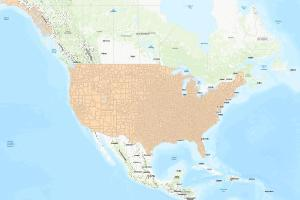

In [43]:
# Get the layer
allprovider = allsearch_result[0]
allprovider

In [44]:
allprovider_layer = allprovider.layers[0]
for f in allprovider_layer.properties.fields[:5]:
    print(f['name'], '\t',f['alias'])

objectid 	 OBJECTID
state 	 state
county 	 county
asian_pop 	 asian_pop
amerind_pop 	 amerind_pop


In [45]:
# Store data from layer as a spatially enabled dataframe
allprovider_df = allprovider_layer.query(as_df=True)
allprovider_df.shape

(3139, 35)

In [46]:
# Create a new column - People per Provider
allprovider_df['people_per_prov'] = allprovider_df['total_population']/allprovider_df['provider_count']

### Plot People per Provider


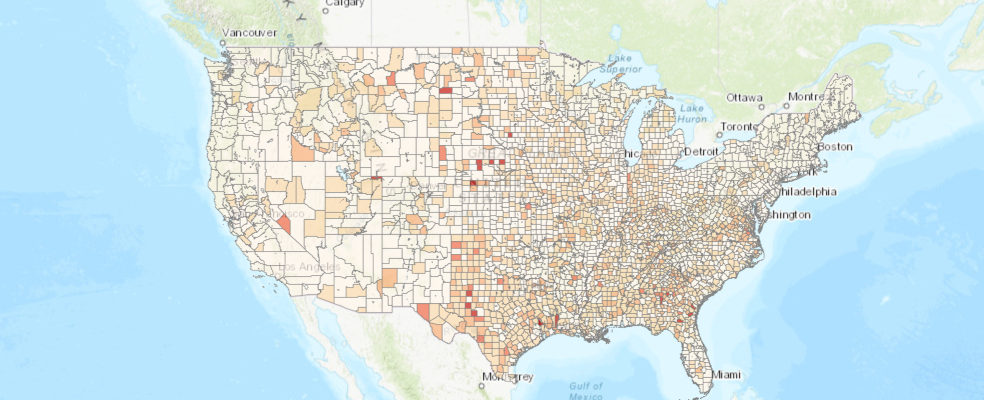

In [51]:
allprovider_map = gis.map('USA', 4)
allprovider_map

> From this map, we can see that:


- Counties in Westen and North Eastern US seem to have the best people to provider ratio with 0-100 people per healthcare provider.


- Areas in North Central US seem to have a mix of both low and high number of people per provider. Nebraska stands out with Thomas, Logan, Loup, Hayes and Wheeler counties where number of people per healthcare provider is > 500.


- Counties in Southern states seem to suffer the most where a majority of counties have 100-200 people per provider or higher.


- Texas seems to stand out where counties like Borden, Glasscock, Irion, San Jacinto, Newton have > 500 people per healthcare provider. We can also see more counties where  number of people per provider is high.

##### Define Renderer

In [48]:
# Define Renderer
allProvTest = {"renderer": {
                 "type": "classBreaks",  
                 "field":"people_per_prov",
                 "transparency":.5,
                 "minValue":1}}

In [49]:
# Define Manual Class breaks
allProvTest['renderer']["classBreakInfos"] = [{
  "classMaxValue": 100.00,
  "label": "0 - 100.00",
  "description": "0 - 100.00",
  "symbol": {
    "type": "esriSFS",
    "style": "esriSFSSolid",
    "color": [255,247,236,178.5],
    "outline": {
      "style": "esriSLSSolid",
      "type": "esriSLS",
      "color": [128,128,128,255],
      "width": 0.05
    }
  }
}, {
  "classMaxValue": 200.00,
  "label": "100.001 - 200.00",
  "description": "100.001 - 200.00",
  "symbol": {
    "type": "esriSFS",
    "style": "esriSFSSolid",
    "color": [253,220,174,178.5],
    "outline": {
      "style": "esriSLSSolid",
      "type": "esriSLS",
      "color": [128,128,128,255],
      "width": 0.05
    }
  }
}, {
  "classMaxValue": 350.00,
  "label": "200.001 - 350.00",
  "description": "200.001 - 350.00",
  "symbol": {
    "type": "esriSFS",
    "style": "esriSFSSolid",
    "color": [252,177,123,178.5],
    "outline": {
      "style": "esriSLSSolid",
      "type": "esriSLS",
      "color": [128,128,128,255],
      "width": 0.05
    }
  }
}, {
  "classMaxValue": 500.00,
  "label": "350.001 - 500.00",
  "description": "350.001 - 500.00",
  "symbol": {
    "type": "esriSFS",
    "style": "esriSFSSolid",
    "color": [241,109,75,178.5],
    "outline": {
      "style": "esriSLSSolid",
      "type": "esriSLS",
      "color": [128,128,128,255],
      "width": 0.05
    }
  }
}, {
  "classMaxValue": 1100.00,
  "label": "500.001 - 1100.00",
  "description": "500.001 - 1100.00",
  "symbol": {
    "type": "esriSFS",
    "style": "esriSFSSolid",
    "color": [200,28,18,178.5],
    "outline": {
      "style": "esriSLSSolid",
      "type": "esriSLS",
      "color": [128,128,128,255],
      "width": 0.05
    }
  }
}]

In [50]:
# Plot Map using defined Renderer
allprovider_map.remove_layers()
allprovider_df.spatial.plot(map_widget=allprovider_map, renderer=allProvTest['renderer'])

True

In [ ]:
allprovider_map.legend=True

An alternate way to create the map without define a renderer is to directly plot the spatial dataframe by using Esri's classification algorithm. Here we show the use of `esriClassifyNaturalBreaks` which breaks the column values naturally into different classes.

In [ ]:
# allprovider_df.spatial.plot(map_widget=allprovider_map,
#         renderer_type='c',  # for class breaks renderer
#         method='esriClassifyNaturalBreaks',  # classification algorithm
#         class_count=6,  # choose the number of classes
#         col='people_per_prov',  # numeric column to classify
#         cmap='OrRd',  # color map to pick colors from for each class
#         alpha=0.7 ,  # specify opacity
#         linewidth = 0.05)

## The Lone Star State - Exploring Texas

The [second largest](https://en.wikipedia.org/wiki/Texas) state in U.S. both by area and population, Texas baosts of 261,231.71 sq mi [land area](https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_area) with a [population](https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States_by_population) of ~28.7 million. The [population density](http://worldpopulationreview.com/states/texas-population/) is low with just 105.2 people per square mile and varies drastically between heavely populated urban areas to sparsely populated rural.


<img src="Texas.jpg">
Image source: https://www.npr.org/sections/thetwo-way/2018/05/24/614195884/new-census-data-shows-texas-cities-are-growing-faster-than-all-other-states


As seen in the previous notebook, Texas has the fourth largest number of healthcare providers in U.S. However, the state stands second highest on Health Resources and Services Administration's (HRSA) list of [shortage areas](https://data.hrsa.gov/topics/health-workforce/shortage-areas). Texas also tops HRSA's list of [medically underserved areas](https://data.hrsa.gov/topics/health-workforce/shortage-areas).  

Let's start our journey with exploring Texas! 

__Get the Data Layer__

In [52]:
# Store data from layer as a spatially enabled dataframe
txprovider_df = allprovider_layer.query(where="state='TX'", out_fields=['objectid','state','county','avg_hhinc',
                                                                            'median_age','total_population','provider_count'],as_df=True)
txprovider_df.shape

(253, 8)

### Provider and Population Density

Let's explore distribution of providers with respect to population density.

In [53]:
txprovider_df['people_per_prov'] = txprovider_df['total_population']/txprovider_df['provider_count']


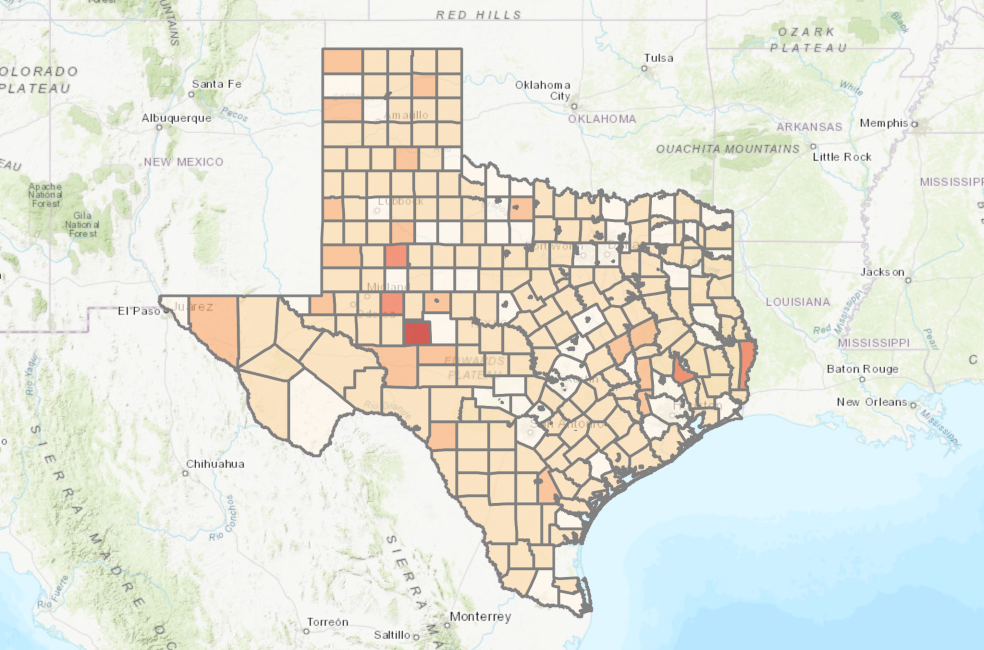

In [63]:
tx_pop_map = gis.map('Texas, USA', zoomlevel=5)
tx_pop_map

> From this map, we can see that 
1. Irion County (in red) seems to be the worst with 799 people per healthcare provider.
2. Borden, Glasscock, San Jacinto, Newton are some counties (dark rust) with 500-700 people per healthcare provider.
3. There are very few counties (in white) in Texas with less than 100 people per healthcare provider.

##### Define Renderer

In [59]:
# Define Renderer
txpopTest = {"renderer": { #This tells python to use JS autocasting
                 "type": "classBreaks",  
                 "field":"people_per_prov",
                 "transparency":.5,
                 "minValue":1}}

In [60]:
# Define Manual Class breaks
txpopTest['renderer']["classBreakInfos"] = [{
  "classMaxValue": 100.00,
  "label": "0 - 100.00",
  "description": "0 - 100.00",
  "symbol": {
    "type": "esriSFS",
    "style": "esriSFSSolid",
    "color": [255,247,236,178.5],
    "outline": {
      "style": "esriSLSSolid",
      "type": "esriSLS",
      "color": [128,128,128,255],
      "width": 2
    }
  }
}, {
  "classMaxValue": 300.00,
  "label": "100.001 - 300.00",
  "description": "100.001 - 300.00",
  "symbol": {
    "type": "esriSFS",
    "style": "esriSFSSolid",
    "color": [253,220,174,178.5],
    "outline": {
      "style": "esriSLSSolid",
      "type": "esriSLS",
      "color": [128,128,128,255],
      "width": 2
    }
  }
}, {
  "classMaxValue": 500.00,
  "label": "300.001 - 500.00",
  "description": "300.001 - 500.00",
  "symbol": {
    "type": "esriSFS",
    "style": "esriSFSSolid",
    "color": [252,177,123,178.5],
    "outline": {
      "style": "esriSLSSolid",
      "type": "esriSLS",
      "color": [128,128,128,255],
      "width": 2
    }
  }
}, {
  "classMaxValue": 700.00,
  "label": "500.001 - 700.00",
  "description": "500.001 - 700.00",
  "symbol": {
    "type": "esriSFS",
    "style": "esriSFSSolid",
    "color": [241,109,75,178.5],
    "outline": {
      "style": "esriSLSSolid",
      "type": "esriSLS",
      "color": [128,128,128,255],
      "width": 2
    }
  }
}, {
  "classMaxValue": 800.00,
  "label": "700.001 - 800.00",
  "description": "700.001 - 800.00",
  "symbol": {
    "type": "esriSFS",
    "style": "esriSFSSolid",
    "color": [200,28,18,178.5],
    "outline": {
      "style": "esriSLSSolid",
      "type": "esriSLS",
      "color": [128,128,128,255],
      "width": 2
    }
  }
}]

##### Plot Map

In [61]:
# Plot Map using defined Renderer
tx_pop_map.remove_layers()
txprovider_df.spatial.plot(map_widget=tx_pop_map, renderer=txpopTest['renderer'])

True

In [62]:
# Change height of map
tx_pop_map.layout.height="650px"

In [ ]:
tx_pop_map.legend=True

### Provider and Avg. Household Income

Let's create a density plot to explore providers with respect to avg. household income.

Text(0.5, 1.05, 'Kernel Density Plot of People per Provider vs Avg. Household Income')

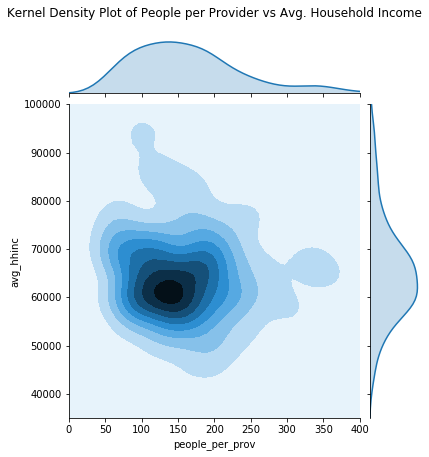

In [64]:
g = sns.jointplot(x='people_per_prov', y='avg_hhinc', data=txprovider_df,xlim=[0,400], ylim=[35000,100000] ,kind='kde', n_levels=8)
g.fig.suptitle('Kernel Density Plot of People per Provider vs Avg. Household Income', y=1.05)

> From this plot we can see that for majority of the counties in Texas the average number of people per healthcare provider vary from 100-200 and the average household income for these counties vary from 60,000 - 70,000 dollars.

### Provider and Median Age

Let's create a density plot to explore providers with respect to median age.

Text(0.5, 1.05, 'Kernel Density Plot of People per Provider vs Median Age')

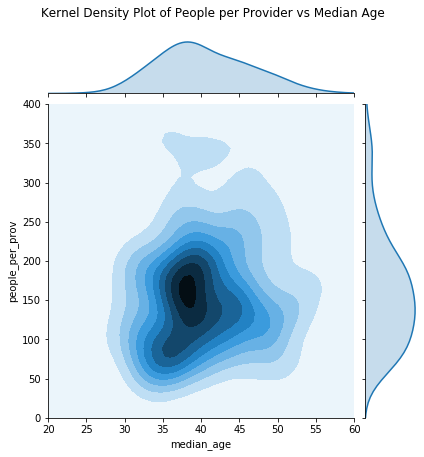

In [65]:
g = sns.jointplot(y='people_per_prov', x='median_age', data=txprovider_df, ylim=[0,400], xlim=[20,60] ,kind='kde')
g.fig.suptitle('Kernel Density Plot of People per Provider vs Median Age', y=1.05)

> From this plot we can see that for majority of the counties in Texas the median age is between 35-45. The average number of people per healthcare provider vary from 60 - 210 for these counties.

## Summary

To summarize, in this notebook we saw that:

- Counties in Westen and North Eastern US seem to have the best people to provider ratio with 0-100 people per healthcare provider.


- Counties in Southern states seem to suffer the most where a majority of counties have 100-200 people per provider or higher.


- Texas seems to stand out in terms of overall healthcare provider shortage:
     - Irion County (in red) seems to be the worst with 799 people per healthcare provider.
     - Borden, Glasscock, San Jacinto, Newton are some counties (dark rust) with 500-700 people per healthcare provider.
     - There are very few counties (in white) in Texas with less than 100 people per healthcare provider.